In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline

c:\users\munol\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)

(60000, 784)


Notice that with MNIST we have very high-dimensional observations (784 features). But we know that there are only 10 kinds of digits and even though there is a variability in image of the same digits, the task of handwritten images places huge constraints on the set of all possible 28x28 images we might encounter. Therefore, we might beleive that our images are scattered across a low-dimensional manifold that is smaller than 784 dimensions. We'll use dimensionality reduction techniques to see if we can capture this space in a way that preserves important differences between the images.

### PCA

In [5]:
pca = PCA(n_components=2)
x_2d_pca = pca.fit_transform(x_test)

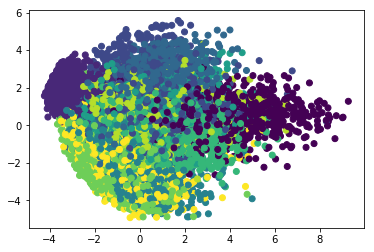

In [6]:
plt.scatter(x_2d_pca[:,0], x_2d_pca[:,1],c=y_test)

Notice that our linear dimensionality reduction is somewhat successful and somewhat not. For a few of the digit types, we tend to see some strong serpartion into clusters - notice the far left and far right of the plot. But in general, the digits types are quite mixed together and this 2D representation seems like it would be unable to truly capture the variance between the images.

### TSNE

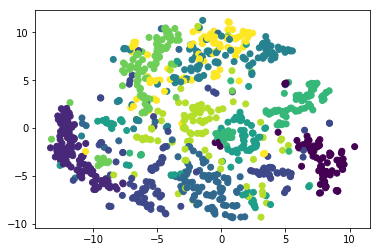

In [7]:
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, init="pca")
x_2d_tsne = tsne.fit_transform(x_test[1:1000])
plt.scatter(x_2d_tsne[:,0], x_2d_tsne[:,1],c=y_test[1:1000])

### Exercise 

TSNE has a couple hyperparameters that can have an impact on the final output. Conduct a search over these hyperparameters to visualize their impact on the results.

This interactive post goes into detail about several aspects of TSNE where we must be careful - https://distill.pub/2016/misread-tsne/.

Most of these examples rely on extremely simple datasets (simpler than MNIST) to demonstrate these cautions. 